In [1]:
import requests
from io import BytesIO
from PIL import Image

# API endpoint URL (replace with your ngrok URL or localhost)
API_URL = "https://c537-34-106-158-61.ngrok-free.app/process-image/"

# Test health check
response = requests.get(API_URL.replace("process-image/", "health"))
if response.status_code == 200:
    print("Health Check:", response.json())
else:
    print(f"Health Check Failed: {response.status_code}")


/Users/tuchsanai/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Health Check: {'status': 'healthy'}


In [6]:
import requests
from PIL import Image
from io import BytesIO

# API endpoint URL (replace with your ngrok URL or localhost)
API_URL = "https://c537-34-106-158-61.ngrok-free.app/process-image/"


# Test image processing
image_path = "../cat1.png"  # Replace with your image path
prompt = "grayscale"

with open(image_path, "rb") as image_file:
    files = {"file": ("image.png", image_file, "image/png")}
    data = {"prompt": prompt}
    response = requests.post(API_URL, files=files, data=data)

if response.status_code == 200:
    processed_image = Image.open(BytesIO(response.content))
    print("Image processed and saved as 'processed_image.png'")
else:
    print(f"Image processing failed: {response.status_code}")
    print(response.text)

Image processed and saved as 'processed_image.png'


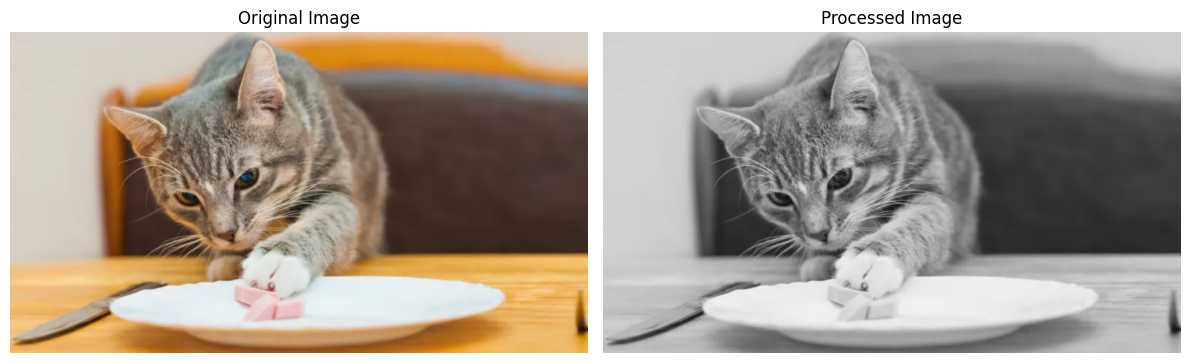

In [7]:
from PIL import Image

import matplotlib.pyplot as plt

# Open the original image
original_image = Image.open(image_path)

# Display the original and processed images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Processed image
axes[1].imshow(processed_image)
axes[1].set_title("Processed Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()